In [3]:
import pandas as pd;
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/titanic.csv'

data = pd.read_csv(file_url)

In [4]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Name      889 non-null    object 
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  889 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.6+ KB


In [6]:
data.describe()

,Pclass,Age,SibSp,Parch,Survived
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.315152,0.524184,0.382452,0.382452
std,0.834700,12.984932,1.103705,0.806761,0.486260
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,1.000000


In [7]:
data.drop(columns = ['Name', 'Sex', 'Ticket', 'Embarked']).corr()

,Pclass,Age,SibSp,Parch,Survived
Pclass,1.000000,-0.336512,0.081656,0.016824,-0.335549
Age,-0.336512,1.000000,-0.232543,-0.171485,-0.069822
SibSp,0.081656,-0.232543,1.000000,0.414542,-0.034040
Parch,0.016824,-0.171485,0.414542,1.000000,0.083151
Survived,-0.335549,-0.069822,-0.034040,0.083151,1.000000


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns 

<Axes: >

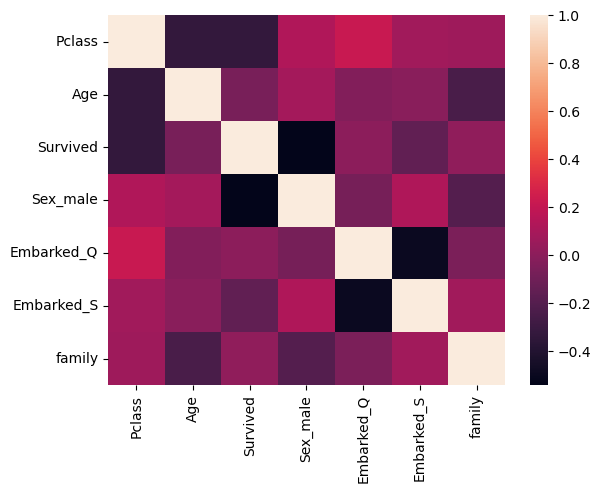

In [33]:
sns.heatmap(data.corr())

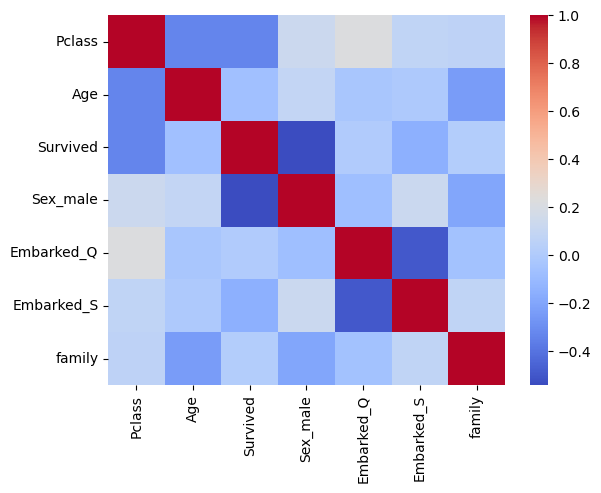

In [34]:
sns.heatmap(data.corr(), cmap ='coolwarm') # 0 을 기준으로 색상이 대칭임
plt.show()

<Axes: >

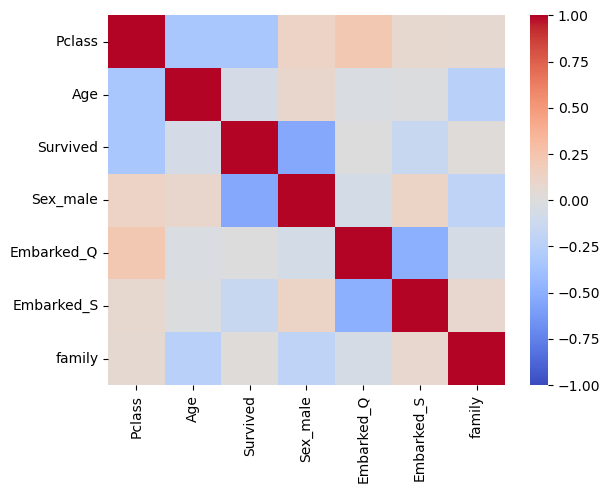

In [35]:
sns.heatmap(data.corr(), cmap='coolwarm', vmin=-1, vmax=1)

<Axes: >

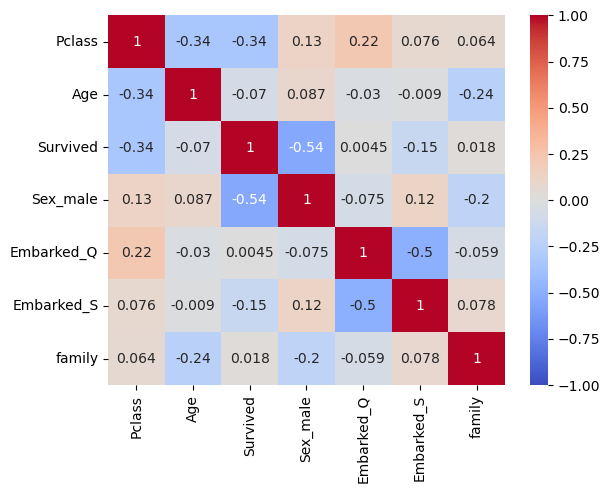

In [36]:
sns.heatmap(data.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True)

In [13]:
data = data.drop(['Name', 'Ticket'], axis = 1)

In [14]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,22.0,1,0,S,0
1,1,female,38.0,1,0,C,1
2,3,female,26.0,0,0,S,1
3,1,female,35.0,1,0,S,1
4,3,male,35.0,0,0,S,0


In [15]:
# one-hot encoding ? 
pd.get_dummies(data, columns=['Sex', 'Embarked'])

,Pclass,Age,SibSp,Parch,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,0,1,0,0,1
1,1,38.0,1,0,1,1,0,1,0,0
2,3,26.0,0,0,1,1,0,0,0,1
3,1,35.0,1,0,1,1,0,0,0,1
4,3,35.0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
884,2,27.0,0,0,0,0,1,0,0,1
885,1,19.0,0,0,1,1,0,0,0,1
886,3,28.0,1,2,0,1,0,0,0,1
887,1,26.0,0,0,1,0,1,1,0,0


In [16]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first = True)

In [17]:
from sklearn.model_selection import train_test_split

X = data.drop('Survived', axis = 1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [19]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [20]:
pred = model.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred) # R^2

0.7921348314606742

In [38]:
model.coef_

array([[-1.1799487 , -0.03901006, -2.58955616, -0.11139094, -0.25934623,
        -0.17419269]])

In [39]:
len(model.coef_)

1

In [24]:
pd.Series(model.coef_[0], index = X.columns)

Pclass       -1.182271
Age          -0.039923
SibSp        -0.321286
Parch         0.007981
Sex_male     -2.568753
Embarked_Q   -0.078722
Embarked_S   -0.235462
dtype: float64

In [25]:
# 1: 생존 0: 사망 
# Pclass가 높을수록 생존 가능성이 낮다. 
# 여자가 더 많이 생존함 
# 나이는 작을수록 더 많이 생존함 

In [26]:
data['family'] = data['SibSp'] + data['Parch']
data.drop(['SibSp', 'Parch'], axis=1, inplace=True)
data.head()

,Pclass,Age,Survived,Sex_male,Embarked_Q,Embarked_S,family
0,3,22.0,0,1,0,1,1
1,1,38.0,1,0,0,0,1
2,3,26.0,1,0,0,1,0
3,1,35.0,1,0,0,1,1
4,3,35.0,0,1,0,1,0


In [27]:
X = data.drop('Survived', axis = 1)
y = data['Survived']
X_train, X_test, y_trin, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
model = LogisticRegression();
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.7921348314606742